#  구조적 API: DataFrame, SQL, Dataset

구조적 API(Structured API)는 비정형 로그파일로부터 반정형 CSV파일, 정형적인 Parquet 파일까지 다양한 데이터를 처리할 수 있다.

구조적 API에는 다음과 같은 3가지 분산 컬렉션 API가 있습니다.
* Datasets
* DataFrames
* SQLtables and Views

배치(Batch)와 스트리밍(Streaming) 처리에 구조적 API를 사용할 수 있습니다. 구조적 API를 활용하면 배치 작업을 스트리밍 작업으로 손쉽게 변환할 수 있습니다.

구조적 API는 데이터 흐름을 정의하는 기본 추상화 개념입니다. 
* 타입형, 비타입형 API 의 개념과 차이점
* 핵심 용어
* 스파크가 구조적 API의 데이터 흐름을 해석하고 클러스터에서 실행하는 방식

> 스파크는 트랜스포메이션의 처리과정을 정의하는 분산 프로그래밍 모델입니다. 사용자가 정의한 다수의 트랜스포메이셔은 지향성 비순환 그래프(DAG)로 표현되는 명령을 만들어냅니다. 액션은 하나의 잡을 클러스터에서 실행하기 위해 스테이지와 태스크로 나누고, DAG 처리 프로세스를 진행합니다. 트랜스포메이션과 액션으로 다루는 구조가 바로 DataFramerhk Dataset입니다. 새로운 DataFrame이나 Dataset을 만들려면 트랜스포메이션을 호출해야합니다. 그리고 연산을 시작하거나 사용한 언어에 맞는 데이터 타입으로  변환하려면 액션을 호출해야합니다.

---


## DataFrames and Datasets
(구분이 안돼서 https://timewizhan.tistory.com/entry/Spark-RDD-vs-Dataframes-vs-Datasets 참고함)
Spark는 DataFrame과 Dataset이라는 두 가지 구조화된 컬렉션 개념을 가지고 있습니다. 

DataFrame과 Dataset은 잘 정의된 로우와 컬럼을 가지는 분산 테이블 형태의 컬렉션입니다. 각 컬럼은 다른 컬럼과 동일한 수의 로우를 가져야합니다. 컬렉션의 모든 로우는 같은 데이터 타입 정보를 가지고 있어야합니다. DataFrame과 Dataset은 결과를 생성하기 위해 어떤 데이터 연산을 적용해야하는지 정의하는 지연 연산의 실행계획이고, 불변성을 가집니다.
> 기본적으로 테이블과 뷰는 DataFrame과 같습니다.

DataFrame에 액션을 호출하면 Spark는 트랜스포메이션을 실제로 실행하고 결과를 반환합니다.
DataFrame과 Dataset을 조금 더 구체적으로 정의하려면 스키마(Schema)를 알아야합니다. 스키마는 분산 컬렉션에 저장할때 데이터타입을 정의하는 방법입니다.


## Schemas
스키마는 DataFrame의 컬럼명과 데이터타입을 정의합니다. 스키마는 데이터소스에서 얻거나 직접 정의할 수 있습니다. 스키마는 여러 데이터 타입으로 구성되므로 어떤 데이터타입이 어느 위치에 있는지 정의하는 방법이 필요합니다.


## Overview of Structured Spark Types
Spark는 사실상 프로그래밍 언어입니다. Spark 는 실행 계획과 처리에 사용하는 자체 데이터타입 정보를 가지고 있는 카탈리스트(Catalyst)엔진을 사용합니다.

카탈리스트 엔진은 다양한 실행퇴적화 기능을 제공합니다.

Spark는 자체 데이터 타입을 지원하는 여러 언어 API와 직접 매핑되어 각 언어에 대한 매핑 테이블을 가지고 있습니다. Python 이나 R을 이용해 Spark의 구조적 API를 사용하더라도 대부분의 연산은 Python 이나 R의 데이터 타입이 아닌 Spark 의 데이터 타입을 사용합니다.
아래의 예는 Spark 의 덧셈연산입니다.


In [3]:
df= spark.range(500).toDF("number")
df.select(df["number"]+10)

# spark 에서 덧셈 연산이 수행되는 이유는 Spark가 
# 지원하는 언어를 이용해 작성된 표현식을 카탈리스트 엔진에서 Spark 의
# 엔진에서 Spark의 데이터 타입으로 반환해 명령을 처리하기 때문이다.

DataFrame[(number + 10): bigint]

## DataFrames  vs Datasets
본질적으로 구조적 API에는 비타입형인 DataFrame과 타입형인 Dataset이 있습니다.

물론 DataFrame에도 데이터타입이 있지만, 스키마에 명시된 데이터타입의 일치여부를 런타임되어서 확인합니다.Dataset은 컴파일 타임에 확인합니다. Dataset은 JVM 기반인 언어인 Scala 와 Java 에서만 지원합니다. Dataset의 데이터 타입을 정의하려면 Scala의 Case Class 나 자바빈을 사용해야합니다.


Spark의 DataFramedms Row 타입으로 구성된 Dataset입니다. Row 타입은 Spark가 사용하는 연산에 최적화된 인메모리 포멧에 내부적인 표현방식입니다.  Row타입을 사용하면 Garbage Collection과 객체 초기화 부하가 있는 JVM데이터 타입을 사용하는 대신 자체 데이터 포맷을 사용하기때문에 매우 효율적인 연산이 가능합니다.


Python 이나 R 에서는 Spark의 Dataset을 사용할 수 없지만, 최적화된 포맷인 Dataframe으로 처리할 수 있다.


## Columns
칼럼은 정수형이나 문자열같은 단순 데이터타입(a simple type), 배열인나 맵같은 복합 데이터 타입(a complex type), 그리고 null 값을 표현한다. Spark는 데이터타입의 모든 정보를 추적해 다양한 컬럼 변환방법을 제공합니다.

Spark 의 커럶은 테이블 컬럼으로 생각해라.


## Rows 
로우는 데이터 레코드 입니다. DataFrame의  레코드는 Row 타입으로 구성됩니다. 로우는 SQL, RDD, 데이터소스에서 얻거나 직접만들 수 있습니다. 다음은 range 메소드로 DataFrame을 생성하는 예제이다.




In [5]:
spark.range(2).collect()
# 두 코드는 모두 row 객체로 이뤄진 배열을 반환한다.

[Row(id=0), Row(id=1)]

## Spark Types
Spark는 여러가지 내부 데이터타입을 가지고 있습니다. `Table 1`, `Table 2`, `Table 3` 은 프로그래밍 언어의 데이터타입이 Spark의 어떤 데이터 타입과 매핑되는지 나타냅니다. 데이터 타입의 컬럼을 초기화하고 정의하는 방법을 알아보겠습니다. 
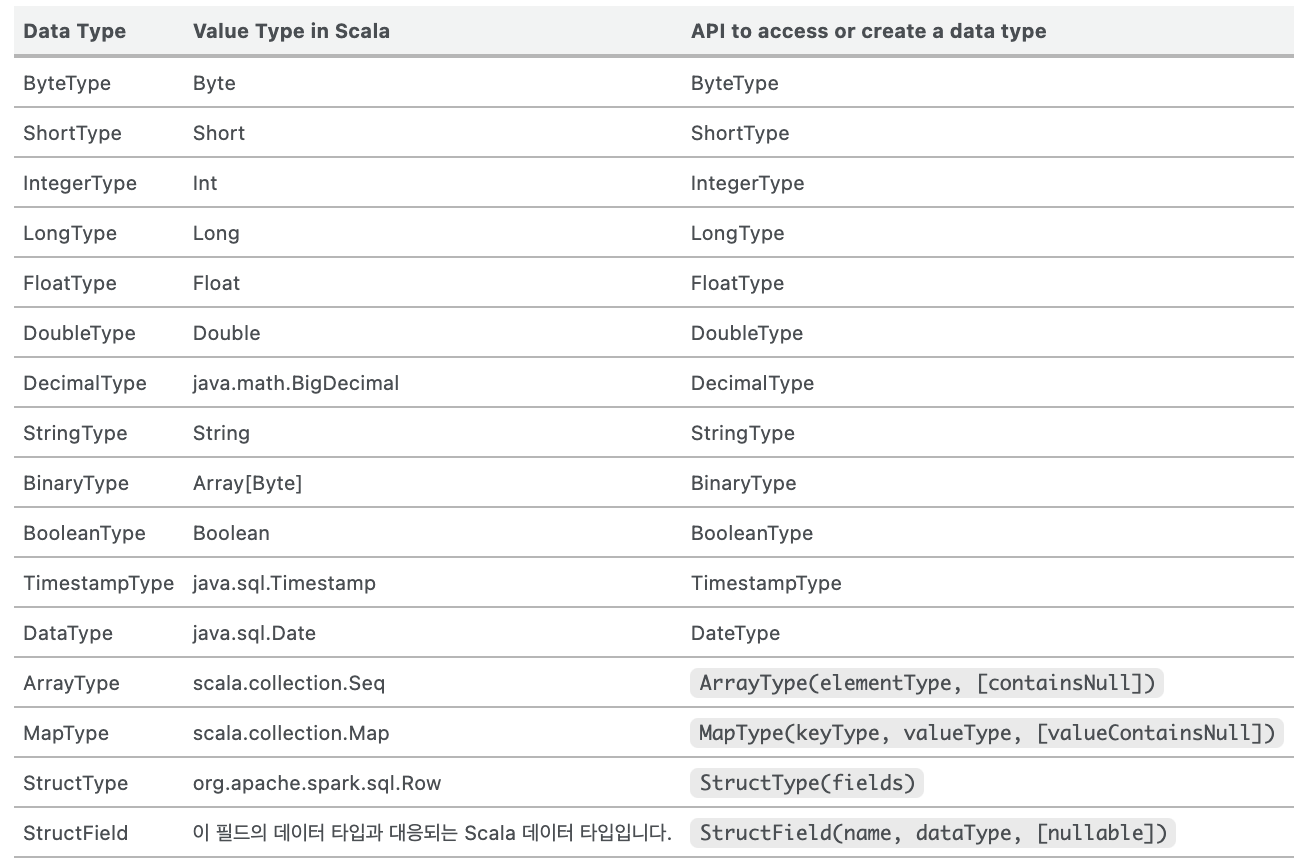

## 구조적 API의 실행과정
스파크 코드가 클러스터에서 실제 처리되는 과정을 설명합니다. 설명만으로 코드를 작성하고 실행하는 절차를 이해할 수 있을 것이다. 이제 구조적 API 쿼리가 사용자 코드에서 실제 실행 코드로 변환되는 과정을 알아보겠습니다.
* DataFrame / Dataset / SQL 을 이용해 코드를 작성합니다.
* 정상적인 코드라면 스파크가 논리적인 실행 계획으로 변환합니다.
* 스파크는 논리적 실행 계획을 물리적 실행계획으로  변환하며 그 과정에서 추가적인 최적화를 할 수 있는지 확인합니다.
* 스파크는 클러스터에서 물리적 실행계획(RDD 처리)을 실행합니다.

먼저 실행할 코드를 작성합니다. 작성한 스파크 코드는 콘솔이나 spark-submit 셸 스크립트로 실행합니다. 카탈리스트 옵티마이저는 코드를 넘겨받고 실제 실행계획을 생성합니다. 마지막으로 스파크는 코드를 실행한 후, 결과를 반환합니다.
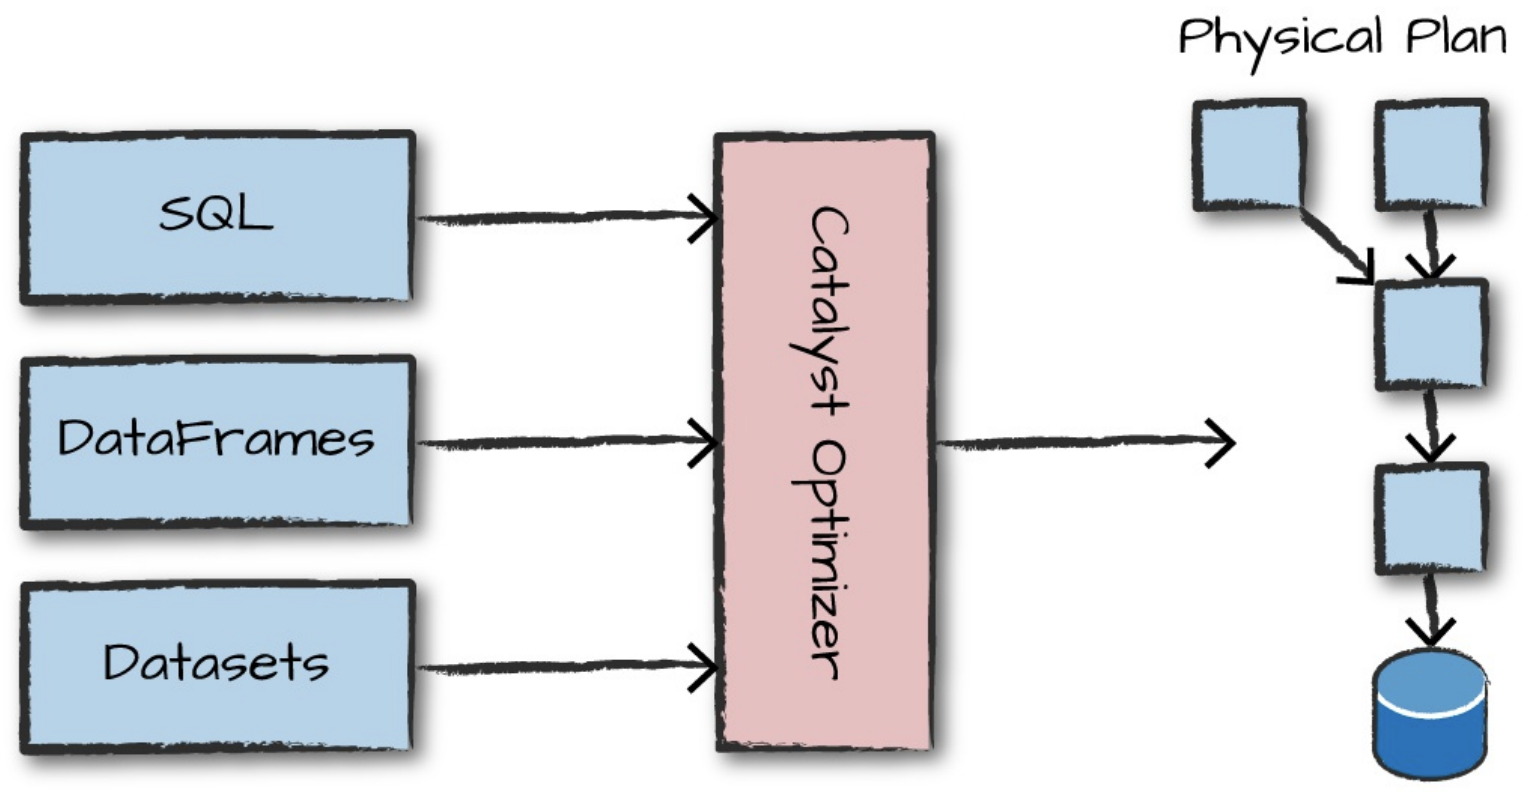


### 논리적인 실행계획
첫 번째 실행단계에서 사용자 코드를 논리적인 실행 계획으로 변환합니다.
논리적인 실행 계획단계에서는 추상적 트랜스포메이션만 포하합니다. 드라이버나 익스큐터의 정보를 고려하지 않습니다. 그리고 사용자의 다양한 표현식을 최적화된 버전으로 변환합니다. 

사용자 코드는 이 과정에서 **검증 전 논리적 실행 계획(Unresolved Logical Plan)** 으로 변환됩니다 코드의 유효성과 테이블이나 컬럼의 존재 여부만을 판단하는 과정이므로 아직 실행 계획을 검증하지 않은 상태입니다.

Spark 분석기(Analyzer)는 컬럼과 테이블을 검증하기 위해 카탈로그, 테이블 저장소, DataFrame 정보를 활용합니다. 필요한 테이블이나 컬럼이 카탈로그에 없다면  검증전 논리적 실행계획이 만들어지지 않습니다. 

테이블과 컬럼에 대한 검증 결과는 카탈리스트 옵티마이저로 전달됩니다. 옵티마이저는 조건절 푸시다운이나 선택절 구문을 이용해 논리적 실행 계획을 최적화하는 규칙의 모음이다. 필요한 경우, 도메인에 최적화된 규칙을 적용할 수 있는 카탈리스트 옵티마이저의 확장형 패키지를 만들 수 있습니다.

### 물리적인 실행계획
Spark 실행 계획이라고 불리는 물리적인 실행계획은 논리적 실행계획은 클러스터 환경에서 실행하는 방법을 정의합니다. `Example 3` 처럼 다양한 물리적 실행 전략을 생성하고 비용 모델을 이용해 비교한 후 최적의 전략을 선택합니다.

물리적 실행 계획은 일련의 RDD와 트랜스포메이션으로 변환됩니다. Spark는 DataFrame,Dataset, SQL 로 정의되니 쿼리를 RDD 트랜스포메이션으로 컴파일 합니다.

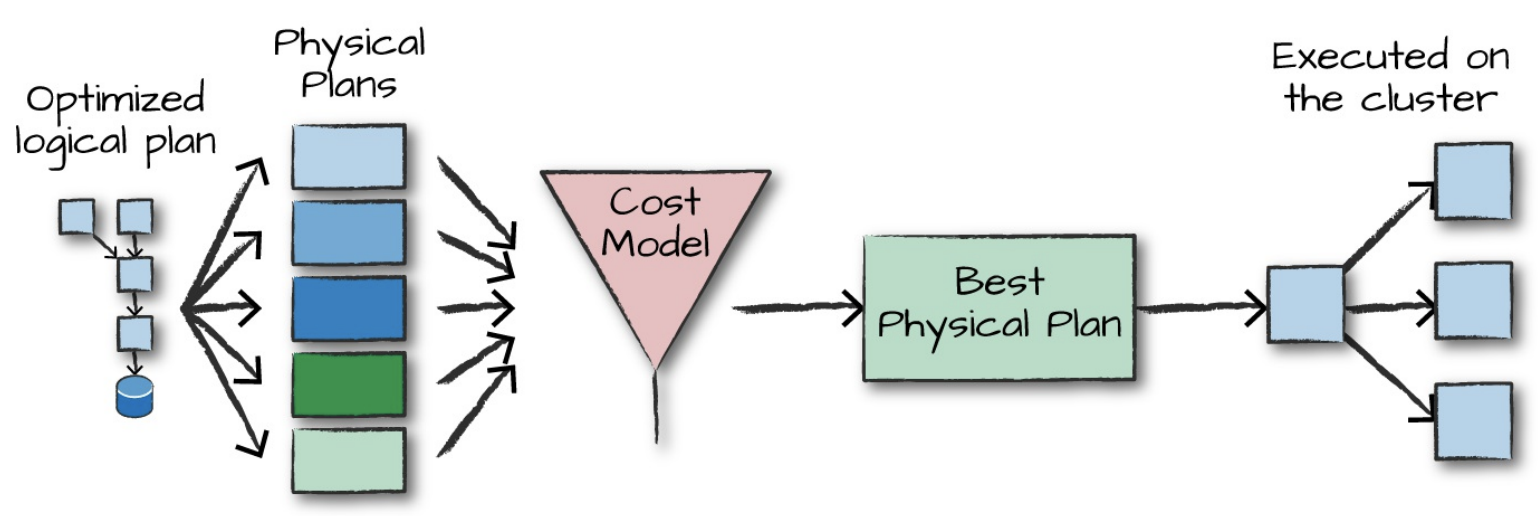

## Execution
Spark는 물리적 실행계획을 선정한 다음 저수준 프로그래밍 인터페이슨 RDD를 대상으로 모든 코드를 실행합니다. Spark는 런타임에 전체 태스크나 스테이지를 제거할 수 있는 Java 바이트 코드를 생성해 추가적인 최적화를 수행하고, 처리결과를 사용자에게 반환한다.